In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print(f"Dispositivo encontrado: {gpu}")

Dispositivo encontrado: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
import sys
sys.path.append('./src/utils')  

from user_functions import *
from manual_reemplacement import *

In [4]:
df_2010_2014 = pd.read_json('./src/data/repositories_2010_to_2014.json')

In [5]:
df_2010_2014.sample(3)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,license,score
6294,163284863,data-mining-cup-2015,howtodowtle/data-mining-cup-2015,"{'login': 'howtodowtle', 'id': 11148638, 'node...",1,2,1,0,"[data-mining, data-science, econometrics, mach...",2018-12-27 11:09:06+00:00,R,True,True,True,False,True,None,1
20080,363314893,S03T03-Estructures_Control,abelbg/S03T03-Estructures_Control,"{'login': 'abelbg', 'id': 54117820, 'node_id':...",0,0,0,0,"[data-science, python]",2021-05-01 03:34:54+00:00,HTML,True,True,True,False,True,None,1
32652,577585435,SIMPLE-LINEAR-REGRESSION-ASSIGNMENT-4-Q2,sanjushasuresh/SIMPLE-LINEAR-REGRESSION-ASSIGN...,"{'login': 'sanjushasuresh', 'id': 119057185, '...",1,0,1,0,"[data-science, machine-learning, python, simpl...",2022-12-13 04:03:17+00:00,Python,True,True,True,False,True,None,1


In [6]:
df_2010_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48774 entries, 0 to 48773
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 48774 non-null  int64              
 1   name               48774 non-null  object             
 2   full_name          48774 non-null  object             
 3   owner              48774 non-null  object             
 4   stargazers_count   48774 non-null  int64              
 5   forks_count        48774 non-null  int64              
 6   watchers_count     48774 non-null  int64              
 7   open_issues_count  48774 non-null  int64              
 8   topics             48774 non-null  object             
 9   created_at         48774 non-null  datetime64[ns, UTC]
 10  language           43891 non-null  object             
 11  has_issues         48774 non-null  bool               
 12  has_projects       48774 non-null  bool       

| **Columna**            | **Descripción**                                                                                                  | **dtype** |
|------------------------|------------------------------------------------------------------------------------------------------------------|-----------|
| `id`                   | El identificador único del repositorio.                                                                          |     int64      |
| `name`                 | El nombre del repositorio.                                                                                       |      object    |
| `full_name`            | El nombre completo del repositorio, incluyendo el nombre del propietario.                                        |     object     |
| `owner`                | Un objeto que contiene información sobre el propietario del repositorio                                          |     object     |
| `stargazers_count`     | El número de estrellas (stars) que el repositorio ha recibido.                                                   |     int64      |
| `forks_count`          | El número de forks (copias) realizadas a partir del repositorio.                                                 |     int64      |
| `watchers_count`       | El número de observadores que están siguiendo las actividades del repositorio.                                   |     int64      |
| `open_issues_count`    | El número de problemas (issues) abiertos en el repositorio.                                                      |    int64       |
| `topics`               | Una lista de temas y palabras clave asociados al repositorio.                                                    |      object    |
| `created_at`           | La fecha y hora en que el repositorio fue creado.                                                                | datetime64[ns, UTC]|
| `language`             | El principal lenguaje de programación utilizado en el repositorio.                                               |      object   |
| `has_issues`           | Valor que indica si el repositorio tiene issues (problemas) habilitados.                                         |        bool   |
| `has_projects`         | Valor que indica si el repositorio tiene proyectos habilitados.                                                  |      bool     |
| `has_downloads`        | Valor que indica si el repositorio permite la descarga de archivos.                                              |       bool    |
| `has_discussions`      | Valor que indica si el repositorio tiene discusiones habilitadas.                                                |      bool     |
| `has_wiki`             | Valor que indica si el repositorio tiene una wiki habilitada.                                                    |      bool     |
| `license`              | El tipo de licencia bajo la cual el repositorio está disponible.                                                 |      object   |
| `score`                | Un valor numérico (0-1) que representa la relevancia de un repositorio en los resultados de una búsqueda.         |     int64    |

In [7]:
df_2010_2014.isnull().sum()

id                       0
name                     0
full_name                0
owner                    0
stargazers_count         0
forks_count              0
watchers_count           0
open_issues_count        0
topics                   0
created_at               0
language              4883
has_issues               0
has_projects             0
has_downloads            0
has_discussions          0
has_wiki                 0
license              32732
score                    0
dtype: int64

In [8]:
df = df_2010_2014.copy()

In [9]:
df = df.drop(["license"], axis=1)
df.isnull().sum()

id                      0
name                    0
full_name               0
owner                   0
stargazers_count        0
forks_count             0
watchers_count          0
open_issues_count       0
topics                  0
created_at              0
language             4883
has_issues              0
has_projects            0
has_downloads           0
has_discussions         0
has_wiki                0
score                   0
dtype: int64

In [10]:
df_check_duplicate = df.copy()
df_check_duplicate = df.set_index('owner')

In [11]:
df['stargazers_count'].dtype

dtype('int64')

In [12]:
columnas = [col for col in df.columns if col not in ['owner', 'license', 'topics']]
duplicados = df[df.duplicated(subset=columnas, keep=False)]

print(len(duplicados))

2912


In [13]:
duplicados.head(6)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,score
6,1555094,shogun,shogun-toolbox/shogun,"{'login': 'shogun-toolbox', 'id': 690673, 'nod...",3032,1037,3032,427,"[artificial-intelligence, c-plus-plus, cmake, ...",2011-04-01 10:44:32+00:00,C++,True,True,True,True,True,1
7,1555094,shogun,shogun-toolbox/shogun,"{'login': 'shogun-toolbox', 'id': 690673, 'nod...",3032,1037,3032,427,"[artificial-intelligence, c-plus-plus, cmake, ...",2011-04-01 10:44:32+00:00,C++,True,True,True,True,True,1
17,3329386,fedmsg,fedora-infra/fedmsg,"{'login': 'fedora-infra', 'id': 3316637, 'node...",170,93,170,47,"[data-science, fedora-project, message-bus, py...",2012-02-01 21:50:18+00:00,Python,True,True,True,False,False,1
19,3329386,fedmsg,fedora-infra/fedmsg,"{'login': 'fedora-infra', 'id': 3316637, 'node...",170,93,170,47,"[data-science, fedora-project, message-bus, py...",2012-02-01 21:50:18+00:00,Python,True,True,True,False,False,1
41,9139182,pydepta,pydepta/pydepta,"{'login': 'pydepta', 'id': 91364402, 'node_id'...",83,28,83,3,[data-science],2013-04-01 01:51:56+00:00,C,True,True,True,False,True,1
44,9139182,pydepta,pydepta/pydepta,"{'login': 'pydepta', 'id': 91364402, 'node_id'...",83,28,83,3,[data-science],2013-04-01 01:51:56+00:00,C,True,True,True,False,True,1


In [14]:
df_clean = df.copy().drop_duplicates(subset=columnas, keep='first')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47318 entries, 0 to 48773
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 47318 non-null  int64              
 1   name               47318 non-null  object             
 2   full_name          47318 non-null  object             
 3   owner              47318 non-null  object             
 4   stargazers_count   47318 non-null  int64              
 5   forks_count        47318 non-null  int64              
 6   watchers_count     47318 non-null  int64              
 7   open_issues_count  47318 non-null  int64              
 8   topics             47318 non-null  object             
 9   created_at         47318 non-null  datetime64[ns, UTC]
 10  language           42596 non-null  object             
 11  has_issues         47318 non-null  bool               
 12  has_projects       47318 non-null  bool            

In [15]:
print(df_clean["topics"].apply(lambda x: x == []).sum())

47


In [16]:
df_clean.loc[df_clean["topics"].apply(lambda x: x == [])].sample(3)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,score
41666,740632255,xgboost-interview-questions,Devinterview-io/xgboost-interview-questions,"{'login': 'Devinterview-io', 'id': 76989322, '...",6,5,6,0,[],2024-01-08 18:36:29+00:00,None,True,True,True,False,True,1
41693,747526318,data-science-bootcamp-2024,AICLUB-IIITDM/data-science-bootcamp-2024,"{'login': 'AICLUB-IIITDM', 'id': 138754240, 'n...",4,91,4,2,[],2024-01-24 05:23:33+00:00,Python,True,True,True,False,False,1
41705,742559413,StressSense,krishnaura45/StressSense,"{'login': 'krishnaura45', 'id': 118080140, 'no...",4,0,4,1,[],2024-01-12 18:44:59+00:00,Jupyter Notebook,True,True,True,False,False,1


In [28]:
empty_topics = df[df['topics'].apply(lambda x: x == [])]

print(empty_topics[['id','full_name']].sample(3))

              id                               full_name
28836  520197073    teamdatatonic/rl-agent-playing-catch
41673  746881096  MIT-Emerging-Talent/2024-group-06-cdsp
41606  750847305                   latitude-dev/latitude


In [22]:
df_clean["topics"] = df_clean.apply(
    lambda row: manual_dic.get(row["id"], row["topics"]) if row["topics"] == [] else row["topics"],
    axis=1
)

In [24]:
df_clean["topics"].apply(lambda x: x == []).sum()

0

In [43]:
# Creando diccionário com cada topic = clave e su conteo = valor, ordenado descendente

all_topics = []
for topics_list in df_clean['topics']:
    all_topics.extend(topics_list)

topic_counts = {}
for topic in all_topics:
    if topic in topic_counts:
        topic_counts[topic] += 1
    else:
        topic_counts[topic] = 1

sorted_topic_counts = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))

print(sorted_topic_counts)

{'data-science': 47317, 'machine-learning': 19307, 'python': 18780, 'data-analysis': 8277, 'data-visualization': 7656, 'pandas': 5185, 'jupyter-notebook': 3689, 'deep-learning': 3612, 'python3': 3267, 'data': 2986, 'r': 2880, 'numpy': 2628, 'matplotlib': 2127, 'statistics': 1937, 'machine-learning-algorithms': 1854, 'artificial-intelligence': 1779, 'scikit-learn': 1712, 'sql': 1617, 'exploratory-data-analysis': 1505, 'seaborn': 1459, 'data-mining': 1421, 'classification': 1377, 'nlp': 1292, 'visualization': 1282, 'ai': 1175, 'data-analytics': 1108, 'eda': 1072, 'sklearn': 993, 'analytics': 981, 'random-forest': 976, 'tensorflow': 976, 'linear-regression': 975, 'kaggle': 966, 'database': 938, 'streamlit': 933, 'data-engineering': 916, 'logistic-regression': 915, 'natural-language-processing': 897, 'dataset': 886, 'regression': 876, 'neural-network': 872, 'ml': 804, 'machinelearning': 797, 'data-cleaning': 762, 'datascience': 750, 'computer-vision': 741, 'analysis': 732, 'clustering': 71

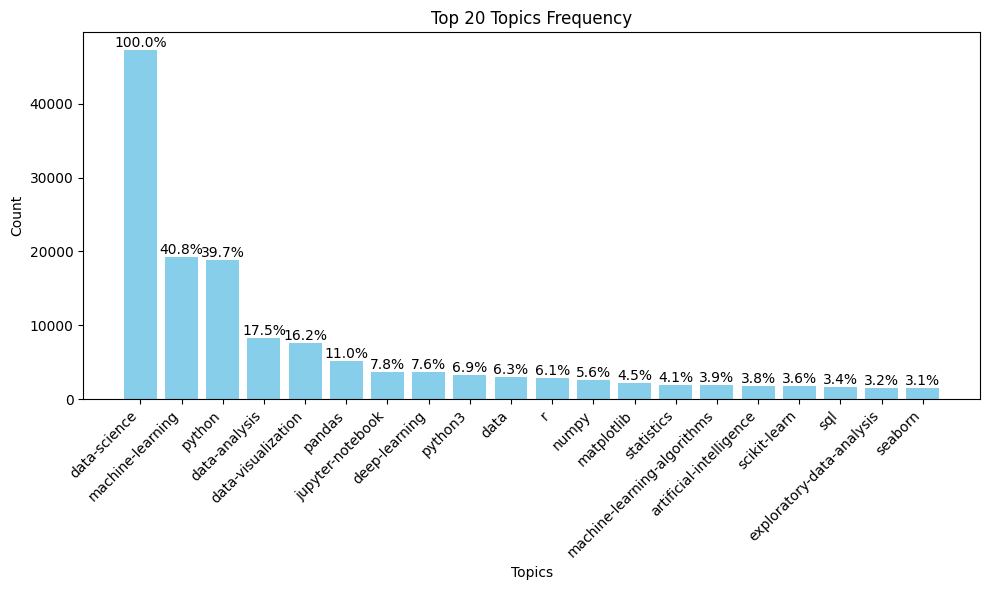

In [44]:
import matplotlib.pyplot as plt

top_20_topics = dict(list(sorted_topic_counts.items())[:20])

max_count = max(top_20_topics.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(top_20_topics.keys(), top_20_topics.values(), color='skyblue')

plt.title('Top 20 Topics Frequency')
plt.xlabel('Topics')
plt.ylabel('Count')

for bar in bars:
    yval = bar.get_height()
    normalized_percentage = (yval / max_count) * 100  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{normalized_percentage:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout() 
plt.show()

In [ ]:
df['year'] = df['created_at'].dt.year  

yearly_top_topics = {}

for year, group in df.groupby('year'):
    all_topics = []
    for topics_list in group['topics']:
        all_topics.extend(topics_list) 
    
    topic_counts = {}
    for topic in all_topics:
        if topic in topic_counts:
            topic_counts[topic] += 1
        else:
            topic_counts[topic] = 1

    sorted_topic_counts = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))

    top_20_topics = dict(list(sorted_topic_counts.items())[:20])

    yearly_top_topics[year] = top_20_topics

print(yearly_top_topics.keys())
print(yearly_top_topics.values())

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
dict_values([{'data-science': 4, 'python': 4, 'data-analysis': 2, 'closember': 1, 'hacktoberfest': 1, 'ipython': 1, 'jupyter': 1, 'notebook': 1, 'repl': 1, 'spec-0': 1, 'big-data': 1, 'brain-imaging': 1, 'brainweb': 1, 'dataflow': 1, 'dataflow-programming': 1, 'neuroimaging': 1, 'workflow-engine': 1, 'machine-learning': 1, 'statistics': 1, 'alignment': 1}, {'data-science': 13, 'python': 7, 'machine-learning': 3, 'data-analysis': 3, 'data-visualization': 2, 'artificial-intelligence': 2, 'c-plus-plus': 2, 'cmake': 2, 'swig': 2, 'visualization': 2, 'data': 2, 'gtk': 1, 'matplotlib': 1, 'plotting': 1, 'qt': 1, 'tk': 1, 'wx': 1, 'data-mining': 1, 'document-similarity': 1, 'fasttext': 1}, {'data-science': 19, 'python': 8, 'statistics': 5, 'javascript': 3, 'fedora-project': 2, 'message-bus': 2, 'zeromq': 2, 'wikidata': 2, 'socr': 2, 'julia': 2, 'data-visualization': 2, 'visualization': 2, 'ap

In [42]:
import re

unique_llm_strings = set()

pattern = r'\bllm\w*\b'

for topics in df_clean["topics"]:
    for topic in topics:
        if re.search(pattern, topic, re.IGNORECASE):
            unique_llm_strings.add(topic)

print(unique_llm_strings)

{'llm-inference', 'llm-agent', 'llm-framework', 'llm-integration', 'llms-questions', 'fine-tuning-llm', 'video-llms', 'llms-interview-questions', 'llm-evaluation', 'llmops-questions', 'llm-observability', 'llm-guardrails', 'llm-course', 'llmops', 'llm-serving', 'llm', 'llm-training', 'llms', 'llm-recommendation', 'llmops-interview-questions', 'llmops-tech-interview', 'llmstack', 'llm-for-time-series', 'open-source-llm', 'llms-langchain', 'llm-deployment', 'llm-finetuning', 'groq-llm', 'llms-tech-interview'}


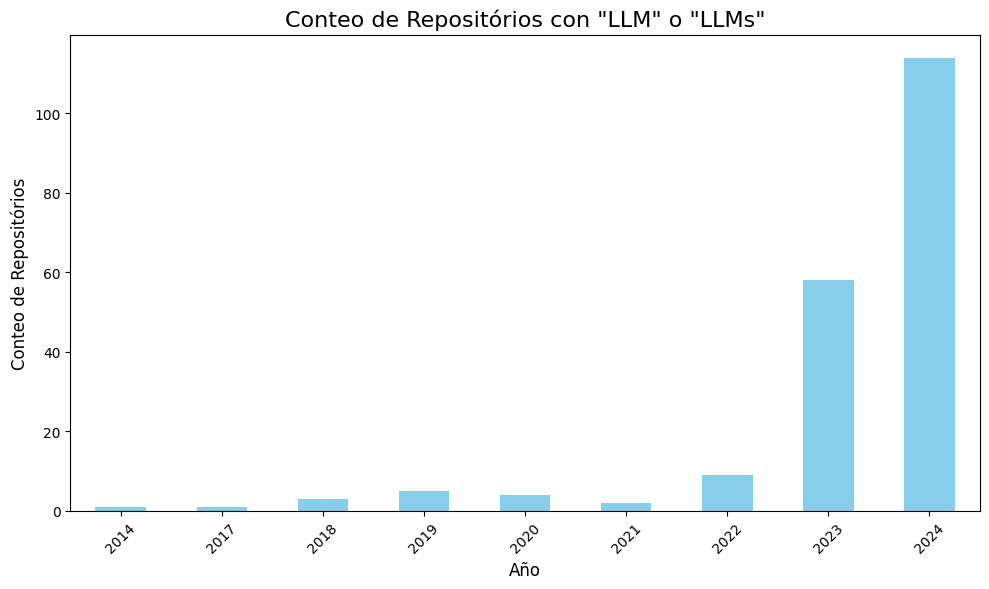

In [ ]:
llm_repositories = df[df['topics'].apply(lambda topics: 'llm' in topics or 'llms' in topics)]

llm_by_year = llm_repositories.groupby('year').size()

llm_by_year.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Conteo de Repositórios con "LLM" o "LLMs"', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Conteo de Repositórios', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()